# Project Fashion Classification

### importing libraries

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [73]:
(X_train, y_train),(X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [74]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [75]:
X_train[13]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [76]:
y_train[13]

5

In [77]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

### Image Visualization

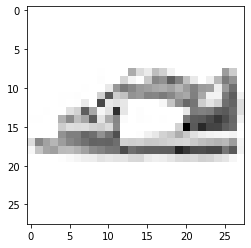

In [78]:
plt.imshow(X_train[13],cmap='Greys')

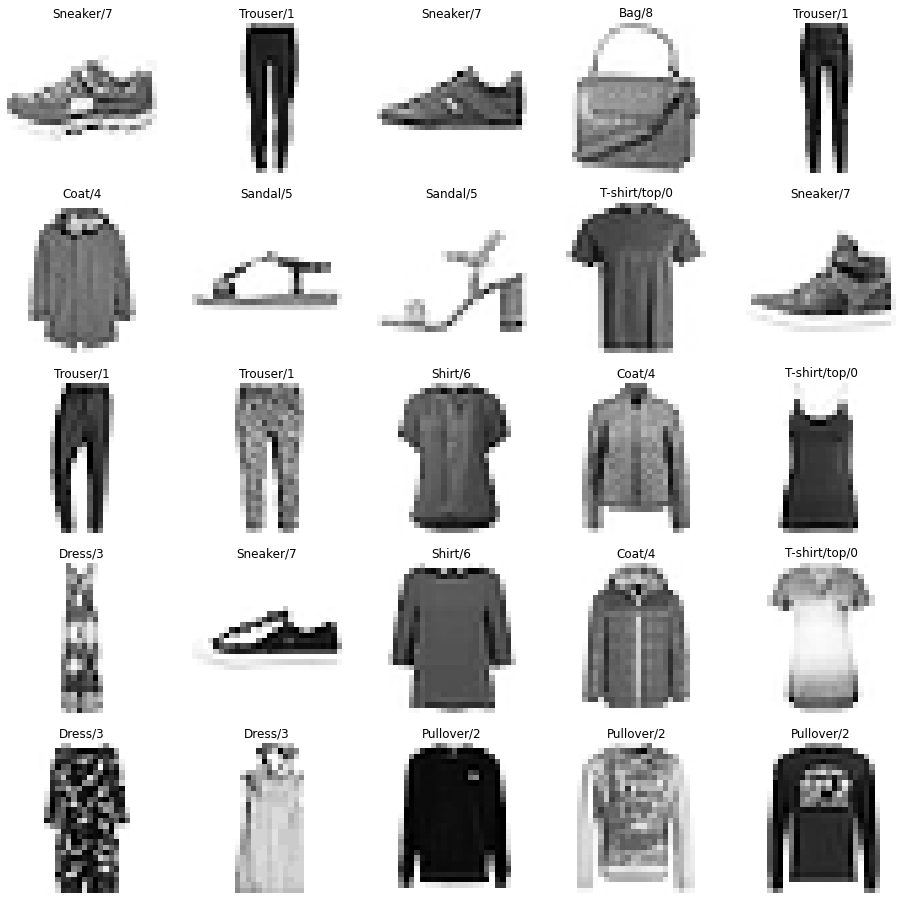

In [79]:
plt.figure(figsize=(16, 16))
j = 1
for i in np.random.randint(0,1000, 25):
  plt.subplot(5, 5, j); j+=1
  plt.imshow(X_train[i], cmap='Greys')
  plt.axis('off')
  plt.title(f'{class_labels[y_train[i]]}/{y_train[i]}')

## Increasing Dimension

In [80]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

## Feature scaling

In [81]:
X_train.ndim

4

In [82]:
X_train = X_train/255
X_test = X_test/255

## splitting dataset

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [84]:
X_train.shape, X_val.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

## Model building

In [85]:
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [86]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [87]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [88]:
model.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_val, y_val))

Epoch 1/20
94/94 [==============================] - 1s 7ms/step - loss: 1.0141 - accuracy: 0.6717 - val_loss: 0.4077 - val_accuracy: 0.8584
Epoch 2/20
94/94 [==============================] - 1s 6ms/step - loss: 0.4181 - accuracy: 0.8529 - val_loss: 0.3479 - val_accuracy: 0.8743
Epoch 3/20
94/94 [==============================] - 1s 6ms/step - loss: 0.3530 - accuracy: 0.8775 - val_loss: 0.3120 - val_accuracy: 0.8857
Epoch 4/20
94/94 [==============================] - 1s 6ms/step - loss: 0.3108 - accuracy: 0.8911 - val_loss: 0.2914 - val_accuracy: 0.8953
Epoch 5/20
94/94 [==============================] - 1s 6ms/step - loss: 0.2882 - accuracy: 0.9008 - val_loss: 0.2749 - val_accuracy: 0.9001
Epoch 6/20
94/94 [==============================] - 1s 6ms/step - loss: 0.2653 - accuracy: 0.9050 - val_loss: 0.2647 - val_accuracy: 0.9031
Epoch 7/20
94/94 [==============================] - 1s 6ms/step - loss: 0.2528 - accuracy: 0.9089 - val_loss: 0.2536 - val_accuracy: 0.9060
Epoch 8/20
94/94 [==

## Testing...

In [89]:
y_pred = model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.26, 0.01, 0.  ]], dtype=float32)

In [90]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2492 - accuracy: 0.9123


[0.24916721880435944, 0.9122999906539917]

## Visualize Output

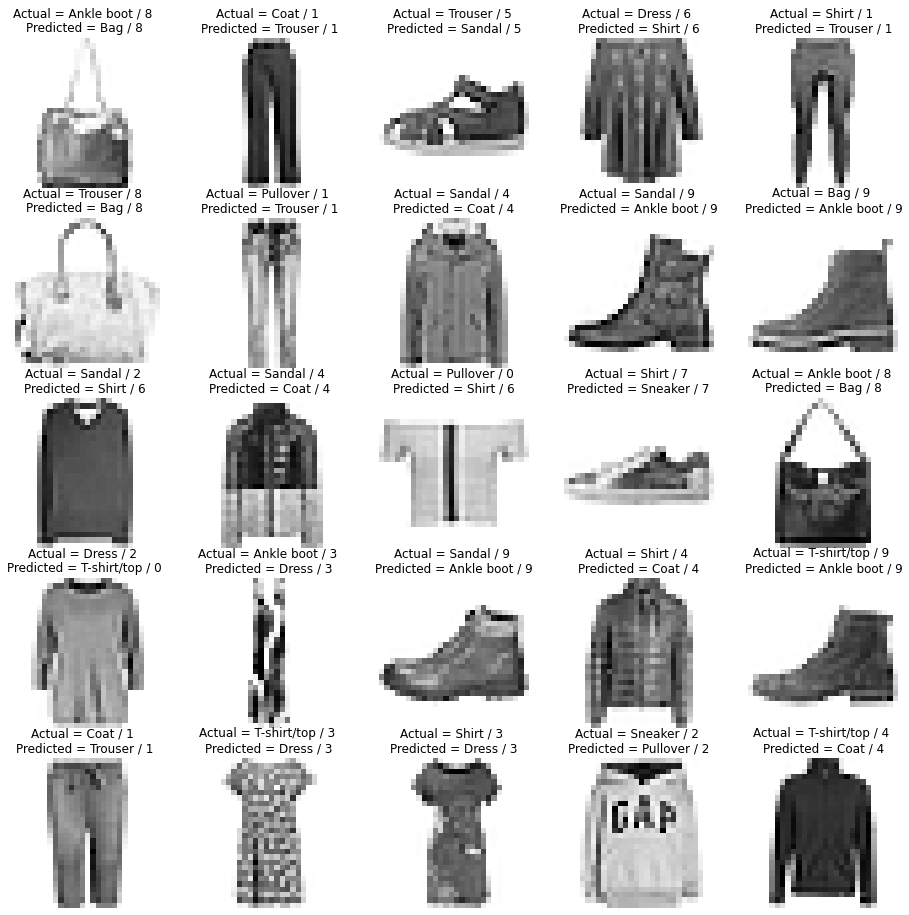

In [91]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title(f'Actual = {class_labels[y_train[i]]} / {y_test[i]} \nPredicted = {class_labels[np.argmax(y_pred[i])]} / {np.argmax(y_pred[i])}')
  plt.axis('off')

## Confusion matrix

In [92]:
from sklearn.metrics import confusion_matrix
y_pred_label = [np.argmax(label) for label in y_pred]
conmat = confusion_matrix(y_test, y_pred_label)

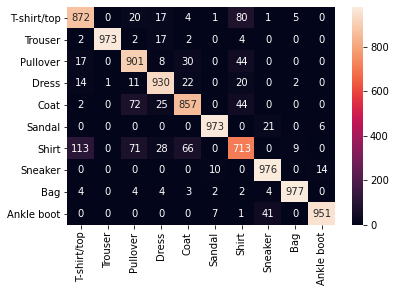

In [93]:
sns.heatmap(conmat, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

In [94]:
from sklearn.metrics import classification_report
clsrpt = classification_report(y_test, y_pred_label, target_names = class_labels)

In [95]:
print(clsrpt)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.87      0.86      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.83      0.90      0.87      1000
       Dress       0.90      0.93      0.92      1000
        Coat       0.87      0.86      0.86      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.79      0.71      0.75      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Save Model

In [96]:
model.save("fashion_mnist_cnn_model.h5")